# Backward D4DX4 scheme

Used close to outer x processor boundaries. The following scheme is 3rd order convergent.

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, together, as_finite_diff, simplify
from sympy import Function, Eq, S

init_printing()

In [2]:
x = symbols('x')
h = symbols('h', positive=True)

f = Function('f')

# Stencils
stencil = [x-5*h ,x-4*h ,x-3*h, x-2*h, x-h, x, x+h]

We are here discretizing the equation

$$ \partial_\rho^4 f$$

### Calculate the finite difference approximation of $\partial_x^4 f$

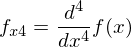

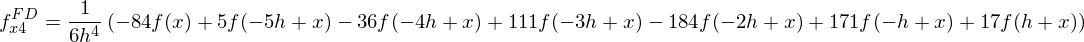

(-84*f(x) + 5*f(-5*h + x) - 36*f(-4*h + x) + 111*f(-3*h + x) - 184*f(-2*h + x) + 171*f(-h + x) + 17*f(h + x))/(6*h**4)


In [3]:
fx4 = f(x).diff(x,4)
fx4FD = as_finite_diff(fx4, stencil)
display(Eq(symbols('f_x4'), fx4))
display(Eq(symbols('f^FD_x4'), together(fx4FD)))
print(together(fx4FD))

# Calculating the order

Let's call the Taylor expansions of $f$ for $T[f(x,a)] = \sum_{n=0}^\infty\frac{f^{(n)}(a)}{n!}(x-a)^n$

In [4]:
x0 = symbols('x0')
terms = 8

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x_0$

In [5]:
F = f(x).series(x, x0=x0, n=terms)
F = F.subs(x-x0,0)
display(Eq(symbols('F'),F))

Taylor expasion of $f$ expanded around $a=x_0+h$ evaluated in $x=x_0$

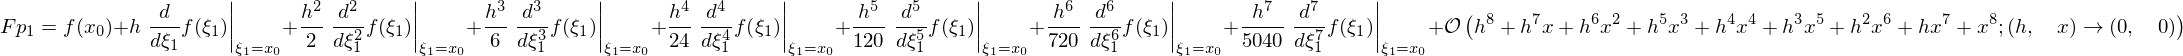

In [6]:
Fp1 = f(x+h).series(x+h, x0=x0, n=terms)
Fp1 = Fp1.subs(x-x0,0)
display(Eq(symbols('Fp1'),Fp1))

Taylor expasion of $f$ expanded around $a=x_0-h$ evaluated in $x=x_0$

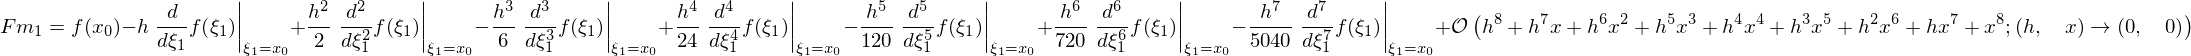

In [7]:
Fm1 = f(x-h).series(x-h, x0=x0, n=terms)
Fm1 = Fm1.subs(x-x0,0)
display(Eq(symbols('Fm1'),Fm1))

Taylor expasion of $f$ expanded around $a=x_0-2h$ evaluated in $x=x_0$

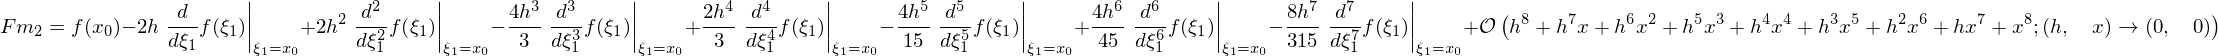

In [8]:
Fm2 = f(x-2*h).series(x-2*h, x0=x0, n=terms)
Fm2 = Fm2.subs(x-x0,0)
display(Eq(symbols('Fm2'),Fm2))

Taylor expasion of $f$ expanded around $a=x_0-3h$ evaluated in $x=x_0$

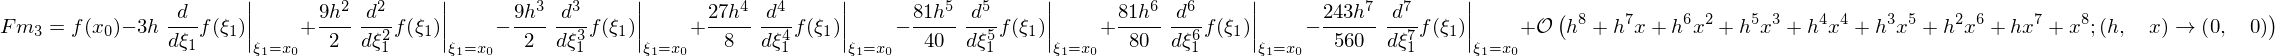

In [9]:
Fm3 = f(x-3*h).series(x-3*h, x0=x0, n=terms)
Fm3 = Fm3.subs(x-x0,0)
display(Eq(symbols('Fm3'),Fm3))

Taylor expasion of $f$ expanded around $a=x_0-4h$ evaluated in $x=x_0$

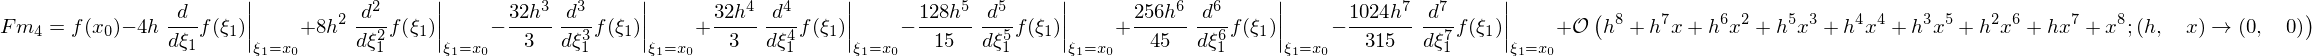

In [10]:
Fm4 = f(x-4*h).series(x-4*h, x0=x0, n=terms)
Fm4 = Fm4.subs(x-x0,0)
display(Eq(symbols('Fm4'),Fm4))

Taylor expasion of $f$ expanded around $a=x_0-5h$ evaluated in $x=x_0$

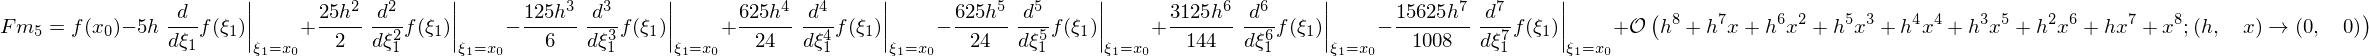

In [11]:
Fm5 = f(x-5*h).series(x-5*h, x0=x0, n=terms)
Fm5 = Fm5.subs(x-x0,0)
display(Eq(symbols('Fm5'),Fm5))

Substitute into the FD scheme

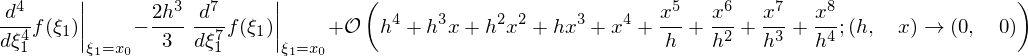

In [12]:
fx4FDT = fx4FD.subs([(f(x+h)  , Fp1),
                     (f(x)    , F  ),
                     (f(x-h)  , Fm1),
                     (f(x-2*h), Fm2),
                     (f(x-3*h), Fm3),
                     (f(x-4*h), Fm4),                     
                     (f(x-5*h), Fm5),                     
                    ])
display(simplify(fx4FDT))

Thus, we see that this discretization is 3rd order accurate.